In [ ]:
from tensorflow.keras.models import Sequential

IMG_SIZE = 224  # Define the image size

# LSTM Model Definition
def create_lstm_model():
    lstm_model = Sequential([
        TimeDistributed(Flatten(), input_shape=(1, IMG_SIZE, IMG_SIZE, 3)),
        LSTM(128, activation='relu', return_sequences=True),
        LSTM(128, activation='relu'),
        Dense(256, activation='relu'),
        Dense(len(label_names), activation='softmax')
    ])
    lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return lstm_model

lstm_model = create_lstm_model()

# Reshape data to add sequence dimension
train_images_lstm = train_images.reshape((train_images.shape[0], 1, IMG_SIZE, IMG_SIZE, 3))
valid_images_lstm = valid_images.reshape((valid_images.shape[0], 1, IMG_SIZE, IMG_SIZE, 3))
test_images_lstm = test_images.reshape((test_images.shape[0], 1, IMG_SIZE, IMG_SIZE, 3))

# Model Training
lstm_history = lstm_model.fit(
    train_images_lstm, train_labels,
    epochs=5,
    validation_data=(valid_images_lstm, valid_labels),
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)


#Output



```
Epoch 1/5
71/71 [==============================] - 142s 2s/step - loss: 1648.2222 - accuracy: 0.3036 - val_loss: 1173.3885 - val_accuracy: 0.5023
Epoch 2/5
71/71 [==============================] - 131s 2s/step - loss: 613.6077 - accuracy: 0.3369 - val_loss: 553.3489 - val_accuracy: 0.1152
Epoch 3/5
71/71 [==============================] - 134s 2s/step - loss: 204.4168 - accuracy: 0.3462 - val_loss: 138.4953 - val_accuracy: 0.5714
Epoch 4/5
71/71 [==============================] - 139s 2s/step - loss: 152.1532 - accuracy: 0.3880 - val_loss: 87.4926 - val_accuracy: 0.2074
Epoch 5/5
71/71 [==============================] - 135s 2s/step - loss: 92.4477 - accuracy: 0.3844 - val_loss: 76.1829 - val_accuracy: 0.5945
```



In [ ]:
import matplotlib.pyplot as plt

# Data from the training process
epochs = [1, 2, 3, 4, 5]
training_loss = [1648.2222, 613.6077, 204.4168, 152.1532, 92.4477]
training_accuracy = [0.3036, 0.3369, 0.3462, 0.3880, 0.3844]
validation_loss = [1173.3885, 553.3489, 138.4953, 87.4926, 76.1829]
validation_accuracy = [0.5023, 0.1152, 0.5714, 0.2074, 0.5945]

# Plotting training and validation loss
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


#Output

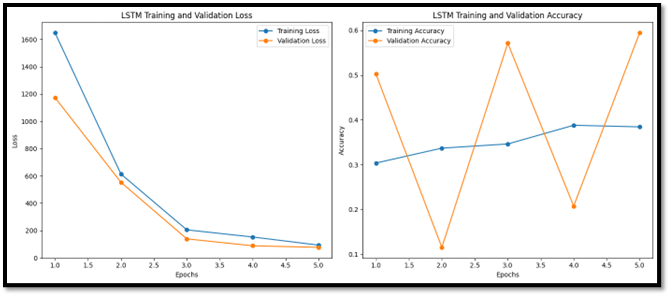

In [ ]:
# Model Evaluation
lstm_test_loss, lstm_test_accuracy = lstm_model.evaluate(test_images_lstm, test_labels)
print(f"LSTM Test accuracy: {lstm_test_accuracy}")

# Confusion Matrix and Classification Report for LSTM
lstm_predictions = lstm_model.predict(test_images_lstm)
lstm_y_pred = np.argmax(lstm_predictions, axis=1)
lstm_true_labels = np.argmax(test_labels, axis=1)

# Ensure consistent labels
unique_labels = np.unique(np.concatenate([lstm_true_labels, lstm_y_pred]))

print('LSTM Classification Report')
print(classification_report(lstm_true_labels, lstm_y_pred, labels=unique_labels, target_names=[label_names[i] for i in unique_labels]))

print('LSTM Confusion Matrix')
lstm_cm = confusion_matrix(lstm_true_labels, lstm_y_pred, labels=unique_labels)
plt.figure(figsize=(10, 10))
sns.heatmap(lstm_cm, annot=True, fmt='d', xticklabels=[label_names[i] for i in unique_labels], yticklabels=[label_names[i] for i in unique_labels], cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Output



```
4/4 [==============================] - 1s 147ms/step - loss: 274.2780 - accuracy: 0.5827
LSTM Test accuracy: 0.5826771855354309
4/4 [==============================] - 1s 135ms/step
LSTM Classification Report
                 precision    recall  f1-score   support

     Cheesecake       0.00      0.00      0.00        10
       Macarons       0.59      0.95      0.73        74
 Macarons-Choco       0.00      0.00      0.00         1
  Macarons-Mint       0.00      0.00      0.00         2
  Macarons-Pink       0.00      0.00      0.00         1
   Macarons-Red       0.00      0.00      0.00         1
Macarons-Yellow       0.00      0.00      0.00         1
          Pizza       0.00      0.00      0.00        11
          Steak       0.50      0.27      0.35        15
       Tiramisu       0.00      0.00      0.00        11

       accuracy                           0.58       127
      macro avg       0.11      0.12      0.11       127
   weighted avg       0.40      0.58      0.46       127

LSTM Confusion Matrix

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
```



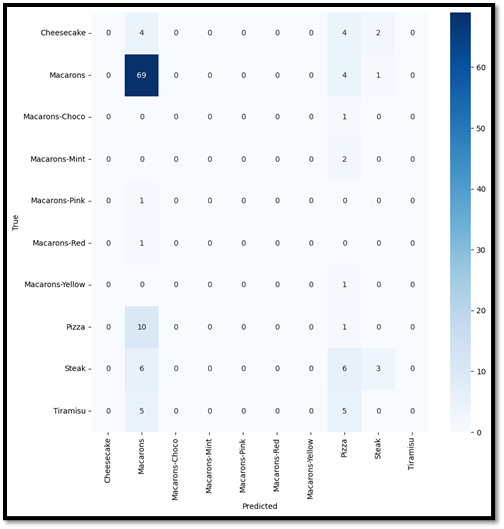